In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orders = pd.read_csv('/content/drive/MyDrive/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/products.csv')
order_products = pd.read_csv('/content/drive/MyDrive/order_products__train.csv')

# Merging the dataframes to get dataset of orders with product names
merged_data = pd.merge(pd.merge(order_products, products, on='product_id'), orders, on='order_id')

# Check for missing values
print(merged_data.isnull().sum())
# Drop duplicates
merged_data.drop_duplicates(inplace=True)


order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [ ]:
orders.to_csv("hadoop_input.txt", sep='\t', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merged_data.head()
# merged_data.to_csv("hadoop.txt", sep='\t', index=False)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0


In [ ]:
merged_data.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

           order_id    product_id  add_to_cart_order     reordered  \
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06   
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01   
std    9.897326e+05  1.412127e+04       7.423936e+00  4.901829e-01   
min    1.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%    8.433700e+05  1.338000e+04       3.000000e+00  0.000000e+00   
50%    1.701880e+06  2.529800e+04       7.000000e+00  1.000000e+00   
75%    2.568023e+06  3.794000e+04       1.200000e+01  1.000000e+00   
max    3.421070e+06  4.968800e+04       8.000000e+01  1.000000e+00   

           aisle_id  department_id       user_id  order_number     order_dow  \
count  1.384617e+06   1.384617e+06  1.384617e+06  1.384617e+06  1.384617e+06   
mean   7.130423e+01   9.839777e+00  1.031128e+05  1.709141e+01  2.701392e+00   
std    3.810409e+01   6.292830e+00  5.948715e+04  1.661404e+01  2.167646e+00   
min    1.000000e+00   1.000000e+00  1.000000e+00 

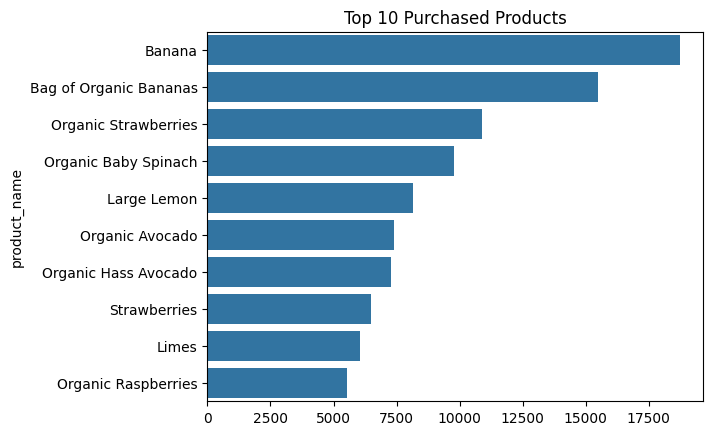

In [ ]:
print(merged_data.describe())
top_products = merged_data['product_name'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Purchased Products')
plt.show()


<ipython-input-6-9028cf3fbab7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_frequency_by_dow.index, y=order_frequency_by_dow.values, palette='viridis')


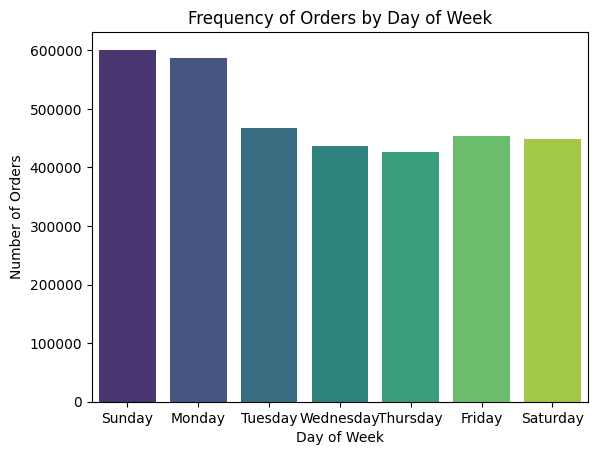

In [ ]:
# Frequency of orders by day of the week
order_frequency_by_dow = orders['order_dow'].value_counts().sort_index()
sns.barplot(x=order_frequency_by_dow.index, y=order_frequency_by_dow.values, palette='viridis')
plt.title('Frequency of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()



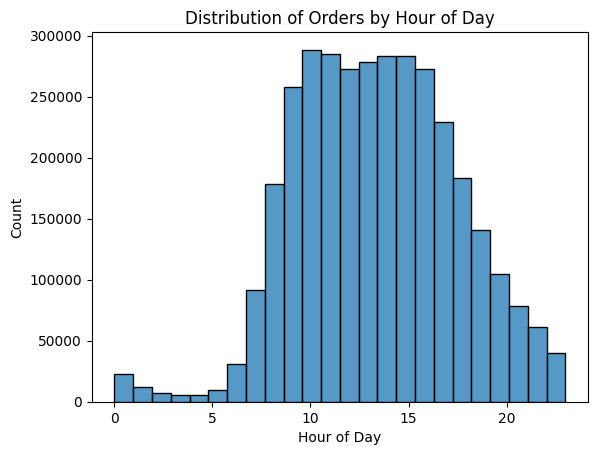

In [ ]:
# Distribution of order hour of the day
sns.histplot(orders['order_hour_of_day'], kde=False, bins=24)
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


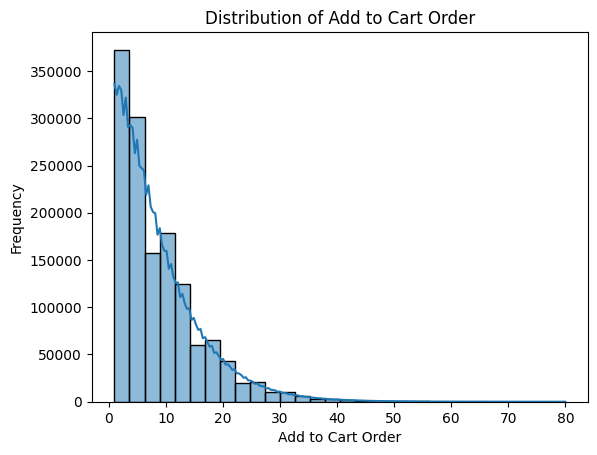

In [ ]:
# Average add to cart order
sns.histplot(merged_data['add_to_cart_order'], kde=True, bins=30)
plt.title('Distribution of Add to Cart Order')
plt.xlabel('Add to Cart Order')
plt.ylabel('Frequency')
plt.show()

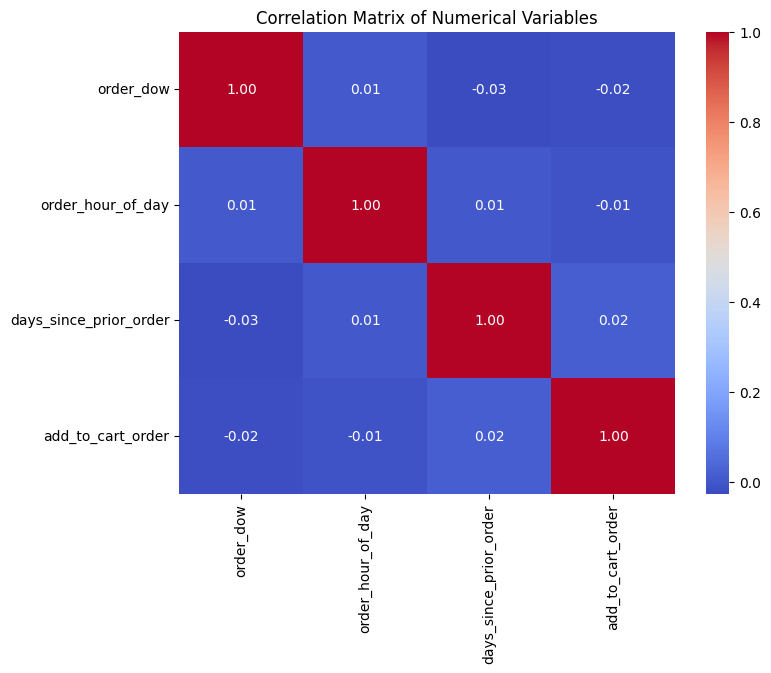

In [ ]:
# Selecting numerical columns for correlation analysis
numerical_cols = ['order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order']
correlation_matrix = merged_data[numerical_cols].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


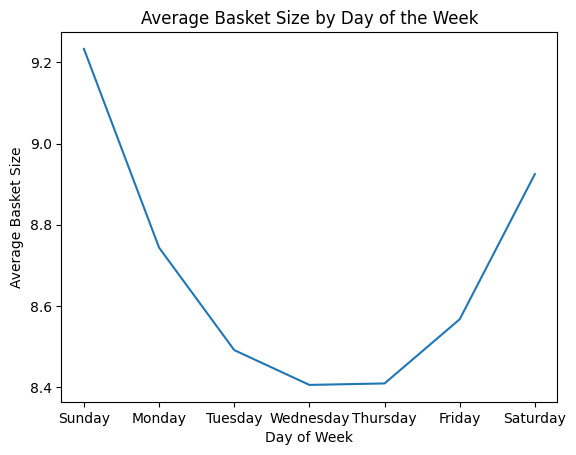

In [ ]:
# Grouping data to find average basket size by day of the week and hour of the day
basket_size_by_dow = merged_data.groupby('order_dow')['add_to_cart_order'].mean().sort_index()
basket_size_by_hour = merged_data.groupby('order_hour_of_day')['add_to_cart_order'].mean().sort_index()

# Plotting the average basket size by day of the week
sns.lineplot(x=basket_size_by_dow.index, y=basket_size_by_dow.values)
plt.title('Average Basket Size by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Basket Size')
plt.xticks(range(0, 7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()



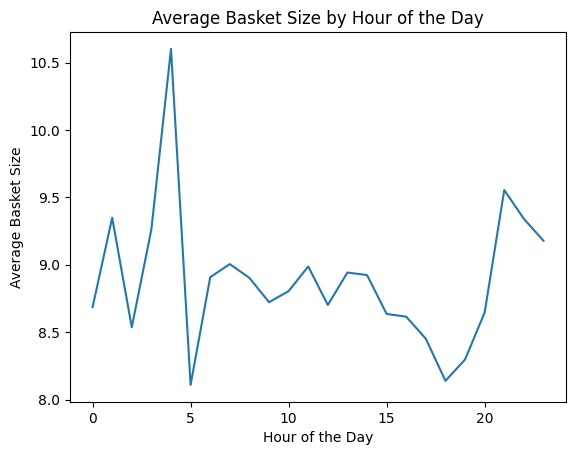

In [ ]:
# Plotting the average basket size by hour of the day
sns.lineplot(x=basket_size_by_hour.index, y=basket_size_by_hour.values)
plt.title('Average Basket Size by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Basket Size')
plt.show()


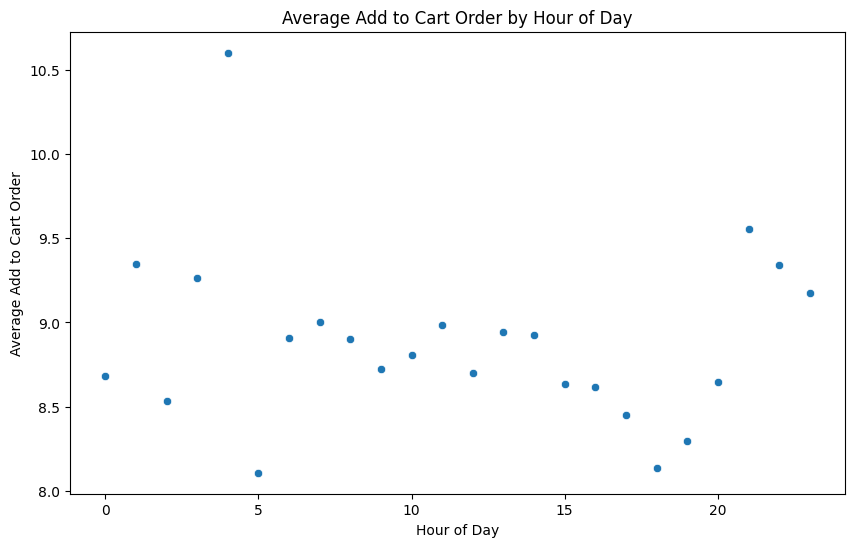

In [ ]:
# Here we calculate the mean add to cart order for each hour of the day
mean_cart_by_hour = merged_data.groupby('order_hour_of_day')['add_to_cart_order'].mean().reset_index()

# Now, we create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_hour_of_day', y='add_to_cart_order', data=mean_cart_by_hour)

plt.title('Average Add to Cart Order by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Add to Cart Order')
plt.show()


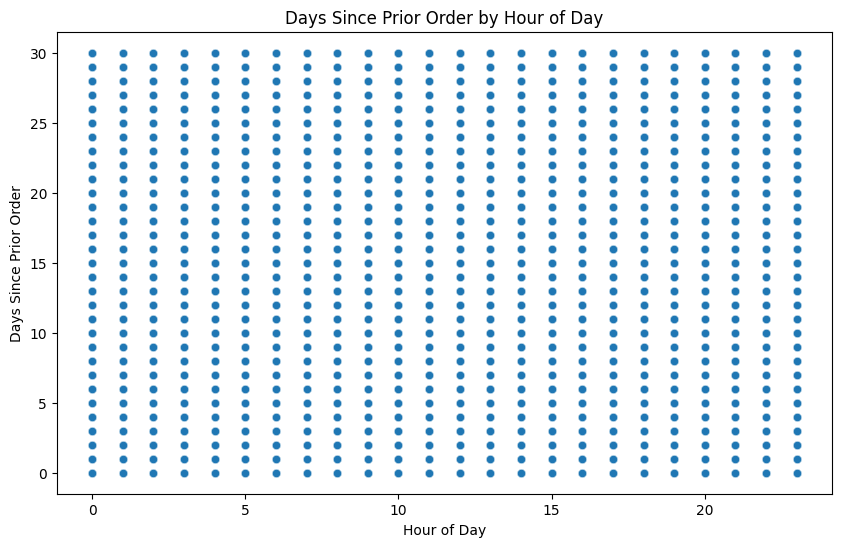

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_hour_of_day', y='days_since_prior_order', data=orders, alpha=0.5)

plt.title('Days Since Prior Order by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Days Since Prior Order')
plt.show()


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-644c0005ff36>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules['confidence'], kde=False, bins=30)


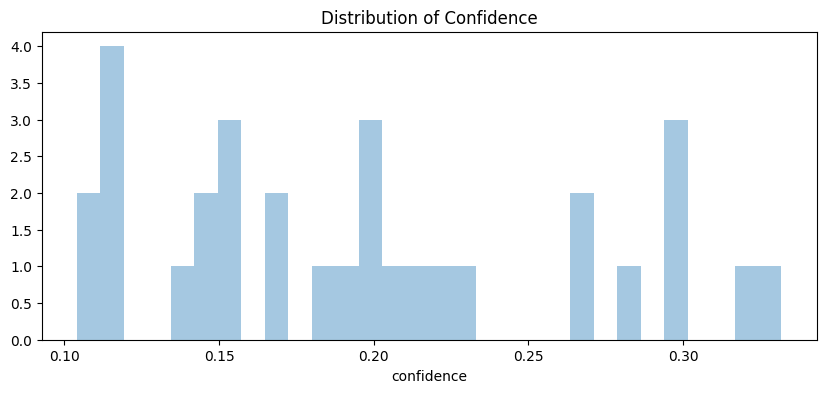

<ipython-input-15-644c0005ff36>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules['lift'], kde=False, bins=30)


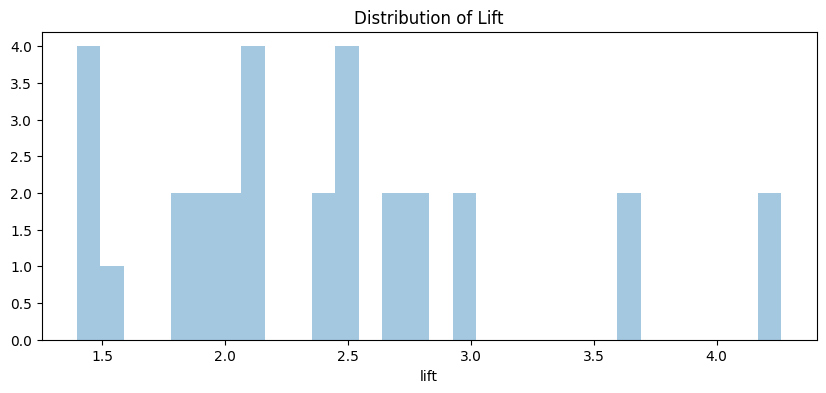

In [ ]:
# Create a list of transactions
transaction_list = list(merged_data.groupby('order_id')['product_name'].apply(list))

# Instantiate TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Generate Visualisation
plt.figure(figsize=(10, 4))
sns.distplot(rules['confidence'], kde=False, bins=30)
plt.title('Distribution of Confidence')
plt.show()

plt.figure(figsize=(10, 4))
sns.distplot(rules['lift'], kde=False, bins=30)
plt.title('Distribution of Lift')
plt.show()



In [ ]:
# Apply FP-Growth algorithm to find frequent itemsets
frequent_itemsets_fp = fpgrowth(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.1)
rules_fp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Organic Hass Avocado),(Bag of Organic Bananas),0.055583,0.117980,0.018444,0.331825,2.812560,0.011886,1.320044,0.682381
1,(Bag of Organic Bananas),(Organic Hass Avocado),0.117980,0.055583,0.018444,0.156331,2.812560,0.011886,1.119416,0.730654
2,(Organic Hass Avocado),(Organic Strawberries),0.055583,0.083028,0.011729,0.211024,2.541609,0.007114,1.162231,0.642246
3,(Organic Strawberries),(Organic Hass Avocado),0.083028,0.055583,0.011729,0.141270,2.541609,0.007114,1.099784,0.661469
4,(Organic Raspberries),(Bag of Organic Bananas),0.042268,0.117980,0.013566,0.320952,2.720400,0.008579,1.298907,0.660318
5,(Bag of Organic Bananas),(Organic Raspberries),0.117980,0.042268,0.013566,0.114987,2.720400,0.008579,1.082167,0.716998
6,(Organic Raspberries),(Organic Strawberries),0.042268,0.083028,0.012728,0.301118,3.626710,0.009218,1.312056,0.756233
7,(Organic Strawberries),(Organic Raspberries),0.083028,0.042268,0.012728,0.153295,3.626710,0.009218,1.131128,0.789847
8,(Organic Strawberries),(Bag of Organic Bananas),0.083028,0.117980,0.023428,0.282174,2.391714,0.013633,1.228738,0.634577
9,(Bag of Organic Bananas),(Organic Strawberries),0.117980,0.083028,0.023428,0.198579,2.391714,0.013633,1.144183,0.659724


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


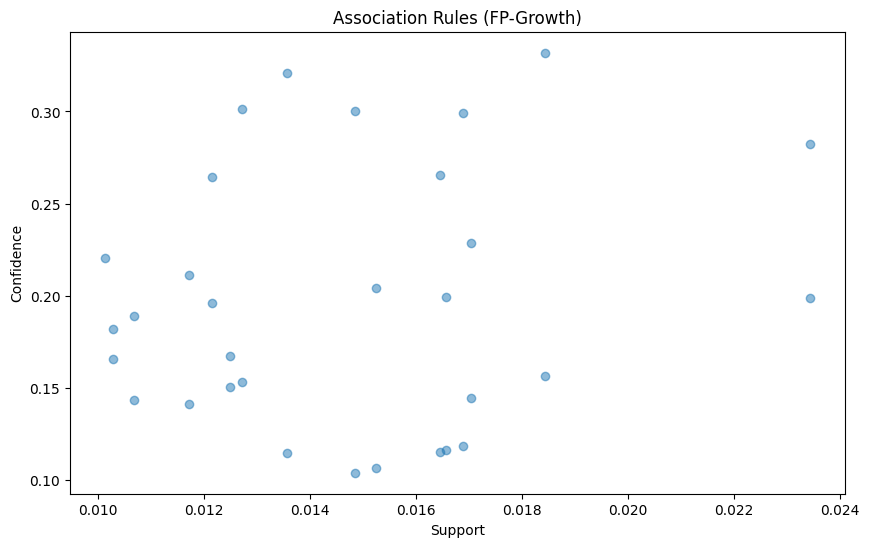

In [ ]:
# Plotting association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules_fp['support'], rules_fp['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules (FP-Growth)')
plt.show()


In [ ]:
# Filter rules
top_rules = rules.sort_values(by='lift', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


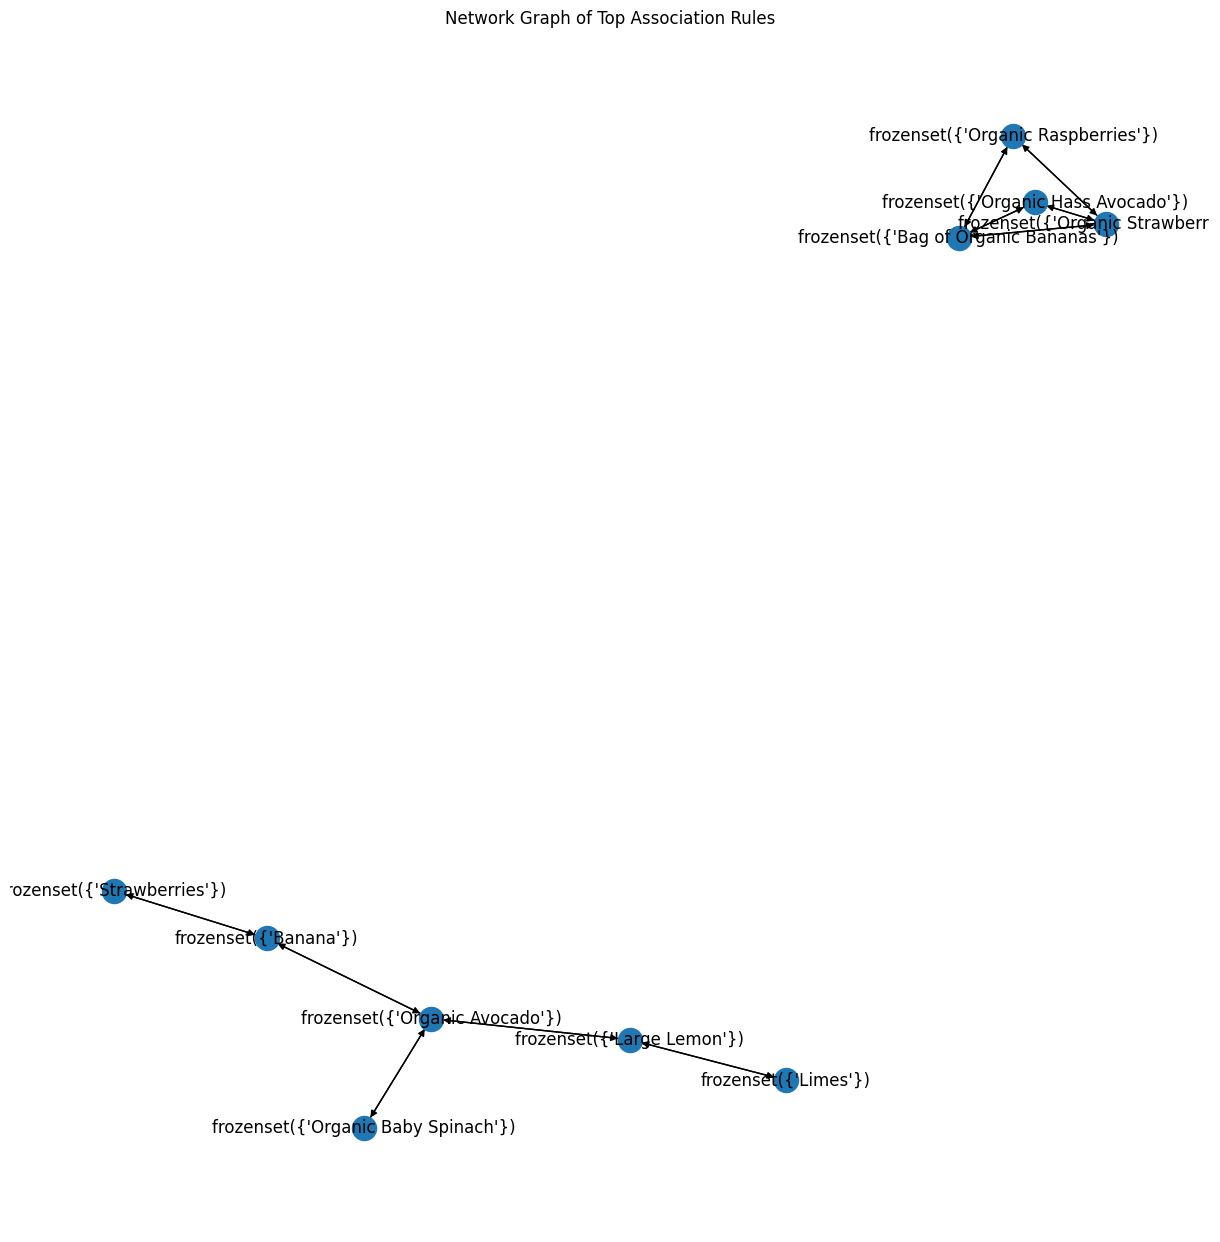

In [ ]:
# Create a network graph
import networkx as nx

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(
    top_rules,
    source='antecedents',
    target='consequents',
    edge_attr=True,
    create_using=nx.DiGraph())

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
plt.title('Network Graph of Top Association Rules')
plt.show()

# Save the rules to a CSV file if needed
rules.to_csv('/content/drive/MyDrive/association_rules.csv', index=False)

In [ ]:
import pandas as pd
output_df=pd.read_csv("output.txt", sep='\t')
output_df.to_csv('opop.csv')